# Spam Email messages

## Problem Statement 

Based on the emails received, build multiple models and chose best model to predict the new email is spam or normal email.

In [106]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [107]:
# Importing dataset

e_message = pd.read_csv('messages.csv',skipinitialspace = True)
e_message.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [108]:
# Checking the dimension of the dataset

e_message.shape

(2893, 3)

In [109]:
# Checking for null values in the dataset

e_message.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [110]:
# Checking the missing ratio

print('Missing Ratio of values in Subject = ',round(len(e_message[e_message['subject'].isnull()]) / len(e_message.subject),2)*100,'%')

Missing Ratio of values in Subject =  2.0 %


In [111]:
# Dropping the rows with null values from the dataset

e_message = e_message.dropna()
e_message.shape

(2831, 3)

In [112]:
# Checking the ratio of values present in the feature 'label'

e_message['label'].value_counts()

0    2363
1     468
Name: label, dtype: int64

In [113]:
# Creating new feature 'message_length' and 'sub_length'

e_message['message_length'] = e_message.message.str.len()
e_message['sub_length'] = e_message.subject.str.len()
e_message.head()

,subject,message,label,message_length,sub_length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856,39
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435,50
3,risk,a colleague and i are researching the differin...,0,324,4
4,request book information,earlier this morning i was on the phone with a...,0,1046,24
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,4492,51


In [114]:
# Preprocessing the data with regular expressions for message

e_message['message'] = e_message['message'].str.lower()

# Replace email addresses with 'email'
e_message['message'] = e_message['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')


# Replace URLs with 'webaddress'
e_message['message'] = e_message['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')


# Replace money symbols with 'dollars'
e_message['message'] = e_message['message'].str.replace(r'€|\$', 'dollars')


# Replace 10 digit phone numbers (formats include paranthesis, space, no space, dashes) with 'phonenumber'
e_message['message'] = e_message['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')


# Replace number with 'number'
e_message['message'] = e_message['message'].str.replace(r'\d+(\.\d+)?', 'numbr')


# Remove punctuation
e_message['message'] = e_message['message'].str.replace(r'[^\w\d\s]', ' ')


# replace whitespaces between terms with a single space
e_message['message'] = e_message['message'].str.replace(r'\s+', ' ')


# Remove leading and trailing whitespaces
e_message['message'] = e_message['message'].str.replace(r'^\s+|\s+?$', '')

In [115]:
# Preprocessing the data with regular expressions for subject

e_message['subject'] = e_message['subject'].str.lower()

# Replace email addresses with 'email'
e_message['subject'] = e_message['subject'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')


# Replace URLs with 'webaddress'
e_message['subject'] = e_message['subject'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')


# Replace money symbols with 'dollars'
e_message['subject'] = e_message['subject'].str.replace(r'€|\$', 'dollars')


# Replace 10 digit phone numbers (formats include paranthesis, space, no space, dashes) with 'phonenumber'
e_message['subject'] = e_message['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')


# Replace number with 'number'
e_message['subject'] = e_message['subject'].str.replace(r'\d+(\.\d+)?', 'numbr')


# Remove punctuation
e_message['subject'] = e_message['subject'].str.replace(r'[^\w\d\s]', ' ')


# replace whitespaces between terms with a single space
e_message['subject'] = e_message['subject'].str.replace(r'\s+', ' ')


# Remove leading and trailing whitespaces
e_message['subject'] = e_message['subject'].str.replace(r'^\s+|\s+?$', '')

In [116]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()

e_message['message'] = e_message['message'].apply(word_tokenize)
e_message['message'] = e_message['message'].apply(lambda x: [lemma.lemmatize(word) for word in x])

e_message['subject'] = e_message['subject'].apply(word_tokenize)
e_message['subject'] = e_message['subject'].apply(lambda x1: [lemma.lemmatize(word) for word in x1])

In [117]:
# Removing stopwords

import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','idk','br','oz'])

# Convert list elements to strings
e_message['message'] = e_message['message'].apply(lambda x: ' '.join(x))
e_message['message'] = e_message['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

e_message['subject'] = e_message['subject'].apply(lambda x: ' '.join(x))
e_message['subject'] = e_message['subject'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [118]:
# Adding new column clean length, after removing stopwords and cleaning the dataset

e_message['clean_message_length'] = e_message.message.str.len()
e_message['clean_subject_length'] = e_message.subject.str.len()

e_message.head(10)                                                                  

,subject,message,label,message_length,sub_length,clean_message_length,clean_subject_length
0,job posting apple research center,content length numbr apple research center dol...,0,2856,39,2132,33
2,query letter frequency text identification,posting inquiry sergei atamas satamas umabnet ...,0,1435,50,1047,42
3,risk,colleague researching differing degree risk pe...,0,324,4,207,4
4,request book information,earlier morning wa phone friend mine living so...,0,1046,24,635,24
5,call abstract optimality syntactic theory,content length numbr call paper best good enou...,0,4492,51,3314,41
6,scandinavian linguistics,scandinavian linguistics university tromsoe nu...,0,2201,35,1550,24
7,call paper linguistics session mla,call paper linguistics session midwest modern ...,0,802,52,640,34
8,foreign language commercial,content length numbr greeting wondering someon...,0,1230,31,795,27
9,fulbright announcement please post disseminate...,fulbright announcement please post disseminate...,0,1478,59,1203,51
10,gala numbr call paper,groningen assembly language acquisition numbr ...,0,2472,27,1723,21


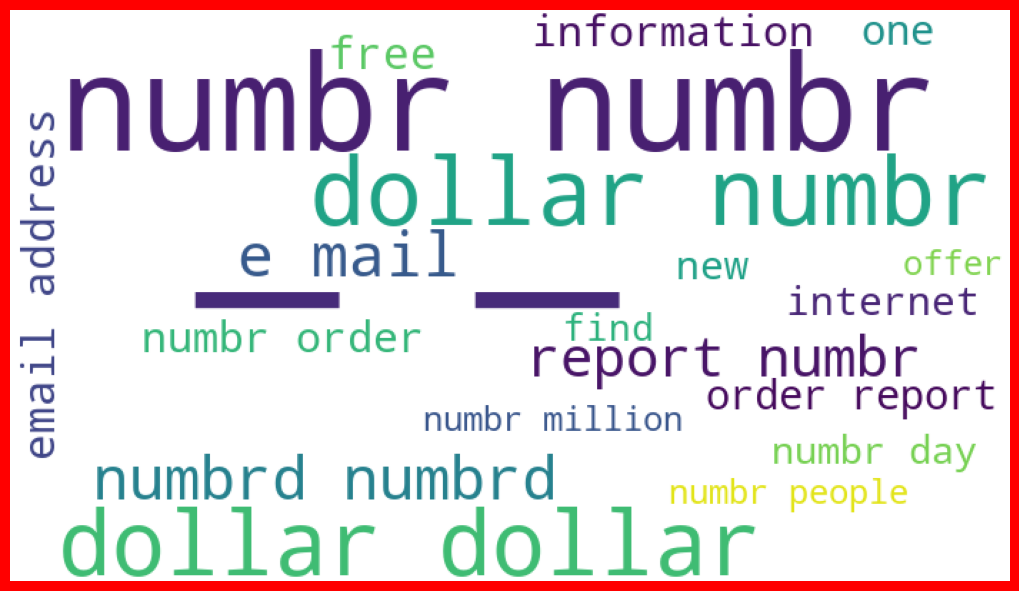

In [119]:
# Getting sense of loud words in negative by wordcloud

from wordcloud import WordCloud


spams = e_message['message'][e_message['label']==1]

spam_cloud = WordCloud(width = 700, height = 400, background_color = 'white', max_words = 20).generate(' '.join(spams))

plt.figure(figsize = (10,8), facecolor = 'r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

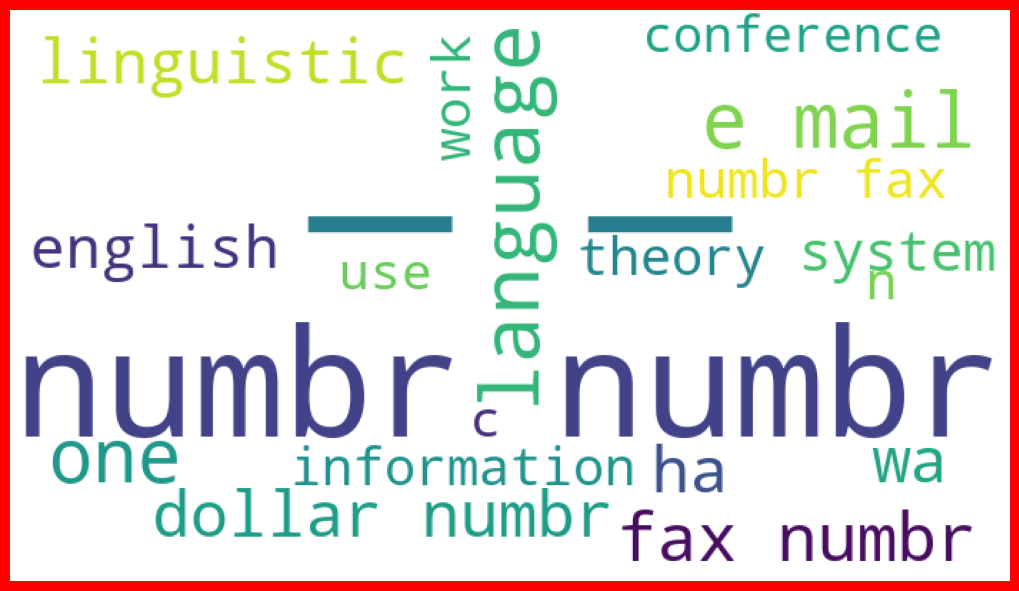

In [120]:
# Getting sense of loud words in spam by wordcloud

from wordcloud import WordCloud


spams = e_message['message'][e_message['label']==0]

spam_cloud = WordCloud(width = 700, height = 400, background_color = 'white', max_words = 20).generate(' '.join(spams))

plt.figure(figsize = (10,8), facecolor = 'r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [121]:
e_message.columns

Index(['subject', 'message', 'label', 'message_length', 'sub_length',
       'clean_message_length', 'clean_subject_length'],
      dtype='object')

In [122]:
# Dropping length features from the dataset

e_message.drop(['message_length','sub_length','clean_message_length','clean_subject_length'],axis=1,inplace=True)
e_message.shape

(2831, 3)

In [124]:
e_message['Email_Message'] = e_message['subject'].str.cat(e_message['message'], sep=' ')
e_message.head()

,subject,message,label,Email_Message
0,job posting apple research center,content length numbr apple research center dol...,0,job posting apple research center content leng...
2,query letter frequency text identification,posting inquiry sergei atamas satamas umabnet ...,0,query letter frequency text identification pos...
3,risk,colleague researching differing degree risk pe...,0,risk colleague researching differing degree ri...
4,request book information,earlier morning wa phone friend mine living so...,0,request book information earlier morning wa ph...
5,call abstract optimality syntactic theory,content length numbr call paper best good enou...,0,call abstract optimality syntactic theory cont...


In [125]:
e_message.drop(['subject','message'],axis=1,inplace=True)
e_message.shape

(2831, 2)

In [126]:
# Vectorization by TF-IDF (TfidfVectorizer)
# Convert text into vector using TF-IDF
# Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer


tf_vec = TfidfVectorizer()

x = tf_vec.fit_transform(e_message['Email_Message'])
y = e_message['label'] 

# Model Evaluation

In [129]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [130]:
# Checking the dimension of the data 

x.shape

(2831, 50968)

In [131]:
# Checking the dimension of the data 

y.shape

(2831,)

## Finding Random State

In [156]:
max_Accuracy = 0
max_Random_state = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf = rf.predict(x_test)
    accuracy = accuracy_score(y_test,predrf)
    
    if accuracy > max_Accuracy:
        max_Accuracy = accuracy
        max_Random_state = i
        
print("Max Accuracy Score is",max_Accuracy*100,"on Random State",max_Random_state)

Max Accuracy Score is 98.47058823529412 on Random State 38


## Train_Test_Split

In [157]:
# Training the Model with .30 as test size and random state at 38

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 38)

In [158]:
MB = MultinomialNB()
MB.fit(x_train,y_train)
print(MB.score(x_train,y_train))
MB_predict = MB.predict(x_test)
cross_val_1 = cross_val_score(MB,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,MB_predict)*100)
print('CV score of MultinomialNB:',cross_val_1.mean()*100)
print(confusion_matrix(y_test,MB_predict))
print(classification_report(y_test,MB_predict))

0.8699952896844089
Accuracy Score: 86.29943502824858
CV score of MultinomialNB: 85.27025258474022
[[599   0]
 [ 97  12]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       599
           1       1.00      0.11      0.20       109

    accuracy                           0.86       708
   macro avg       0.93      0.56      0.56       708
weighted avg       0.88      0.86      0.81       708



In [159]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict = LR.predict(x_test)
cross_val_2 = cross_val_score(LR,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,LR_predict)*100)
print('CV score of LogisticRegression:',cross_val_2.mean()*100)
print(confusion_matrix(y_test,LR_predict))
print(classification_report(y_test,LR_predict))

0.9759773904851625
Accuracy Score: 97.88135593220339
CV score of LogisticRegression: 95.40760683281295
[[599   0]
 [ 15  94]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       599
           1       1.00      0.86      0.93       109

    accuracy                           0.98       708
   macro avg       0.99      0.93      0.96       708
weighted avg       0.98      0.98      0.98       708



In [160]:
svc = SVC(probability = True)
svc.fit(x_train,y_train)
print(svc.score(x_train,y_train))
svc_predict = svc.predict(x_test)
cross_val_3 = cross_val_score(svc,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,svc_predict)*100)
print('CV score of Support Vector Classifier:',cross_val_3.mean()*100)
print(confusion_matrix(y_test,svc_predict))
print(classification_report(y_test,svc_predict))

1.0
Accuracy Score: 98.87005649717514
CV score of Support Vector Classifier: 97.28008675005141
[[599   0]
 [  8 101]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       599
           1       1.00      0.93      0.96       109

    accuracy                           0.99       708
   macro avg       0.99      0.96      0.98       708
weighted avg       0.99      0.99      0.99       708



In [161]:
KNC = KNeighborsClassifier()
KNC.fit(x_train,y_train)
print(KNC.score(x_train,y_train))
KNC_predict = KNC.predict(x_test)
cross_val_4 = cross_val_score(KNC,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,KNC_predict)*100)
print('CV score of KNeighbors Classifier:',cross_val_4.mean()*100)
print(confusion_matrix(y_test,KNC_predict))
print(classification_report(y_test,KNC_predict))

0.9773904851625059
Accuracy Score: 96.89265536723164
CV score of KNeighbors Classifier: 95.7967356553929
[[579  20]
 [  2 107]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       599
           1       0.84      0.98      0.91       109

    accuracy                           0.97       708
   macro avg       0.92      0.97      0.94       708
weighted avg       0.97      0.97      0.97       708



In [162]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
print(DTC.score(x_train,y_train))
DTC_predict = DTC.predict(x_test)
cross_val_5 = cross_val_score(DTC,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,DTC_predict)*100)
print('CV score of Decision Tree Classifier:',cross_val_5.mean()*100)
print(confusion_matrix(y_test,DTC_predict))
print(classification_report(y_test,DTC_predict))

1.0
Accuracy Score: 95.90395480225989
CV score of Decision Tree Classifier: 94.41964090962912
[[581  18]
 [ 11  98]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       599
           1       0.84      0.90      0.87       109

    accuracy                           0.96       708
   macro avg       0.91      0.93      0.92       708
weighted avg       0.96      0.96      0.96       708



In [163]:
ETC = ExtraTreeClassifier()
ETC.fit(x_train,y_train)
print(ETC.score(x_train,y_train))
ETC_predict = ETC.predict(x_test)
cross_val_6 = cross_val_score(ETC,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,ETC_predict)*100)
print('CV score of Extra Tree Classifier:',cross_val_6.mean()*100)
print(confusion_matrix(y_test,ETC_predict))
print(classification_report(y_test,ETC_predict))

1.0
Accuracy Score: 91.10169491525424
CV score of Extra Tree Classifier: 90.64003091093787
[[567  32]
 [ 31  78]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       599
           1       0.71      0.72      0.71       109

    accuracy                           0.91       708
   macro avg       0.83      0.83      0.83       708
weighted avg       0.91      0.91      0.91       708



In [164]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
print(RFC.score(x_train,y_train))
RFC_predict = RFC.predict(x_test)
cross_val_7 = cross_val_score(RFC,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,RFC_predict)*100)
print('CV score of Random Forest Classifier:',cross_val_7.mean()*100)
print(confusion_matrix(y_test,RFC_predict))
print(classification_report(y_test,RFC_predict))

1.0
Accuracy Score: 98.58757062146893
CV score of Random Forest Classifier: 97.31523547777965
[[599   0]
 [ 10  99]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       599
           1       1.00      0.91      0.95       109

    accuracy                           0.99       708
   macro avg       0.99      0.95      0.97       708
weighted avg       0.99      0.99      0.99       708



In [165]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
print(GBC.score(x_train,y_train))
GBC_predict = GBC.predict(x_test)
cross_val_8 = cross_val_score(GBC,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,GBC_predict)*100)
print('CV score of Gradient Boosting Classifier:',cross_val_8.mean()*100)
print(confusion_matrix(y_test,GBC_predict))
print(classification_report(y_test,GBC_predict))

1.0
Accuracy Score: 99.01129943502825
CV score of Gradient Boosting Classifier: 97.13899327562461
[[597   2]
 [  5 104]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       599
           1       0.98      0.95      0.97       109

    accuracy                           0.99       708
   macro avg       0.99      0.98      0.98       708
weighted avg       0.99      0.99      0.99       708



In [166]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
print(BC.score(x_train,y_train))
BC_predict = BC.predict(x_test)
cross_val_9 = cross_val_score(BC,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,BC_predict)*100)
print('CV score of Bagging Classifier:',cross_val_9.mean()*100)
print(confusion_matrix(y_test,BC_predict))
print(classification_report(y_test,BC_predict))

0.9948186528497409
Accuracy Score: 98.30508474576271
CV score of Bagging Classifier: 96.15027950716997
[[596   3]
 [  9 100]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       599
           1       0.97      0.92      0.94       109

    accuracy                           0.98       708
   macro avg       0.98      0.96      0.97       708
weighted avg       0.98      0.98      0.98       708



In [167]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
print(ABC.score(x_train,y_train))
ABC_predict = ABC.predict(x_test)
cross_val_10 = cross_val_score(ABC,x,y,cv=5)

    
print('Accuracy Score:',accuracy_score(y_test,ABC_predict)*100)
print('CV score of AdaBoost Classifier:',cross_val_10.mean()*100)
print(confusion_matrix(y_test,ABC_predict))
print(classification_report(y_test,ABC_predict))

1.0
Accuracy Score: 99.57627118644068
CV score of AdaBoost Classifier: 98.44603984768885
[[596   3]
 [  0 109]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       599
           1       0.97      1.00      0.99       109

    accuracy                           1.00       708
   macro avg       0.99      1.00      0.99       708
weighted avg       1.00      1.00      1.00       708



# AUC_ROC_Curve

In [168]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

MultinomialNB() 0.555045871559633
LogisticRegression() 0.9311926605504588
RandomForestClassifier() 0.9541284403669725
ExtraTreeClassifier() 0.8310869798287667
DecisionTreeClassifier() 0.9345162426674426
KNeighborsClassifier() 0.9741311972553645
GradientBoostingClassifier() 0.9753947711016833
AdaBoostClassifier() 0.9974958263772955
BaggingClassifier() 0.9562114227075709
SVC(probability=True) 0.963302752293578


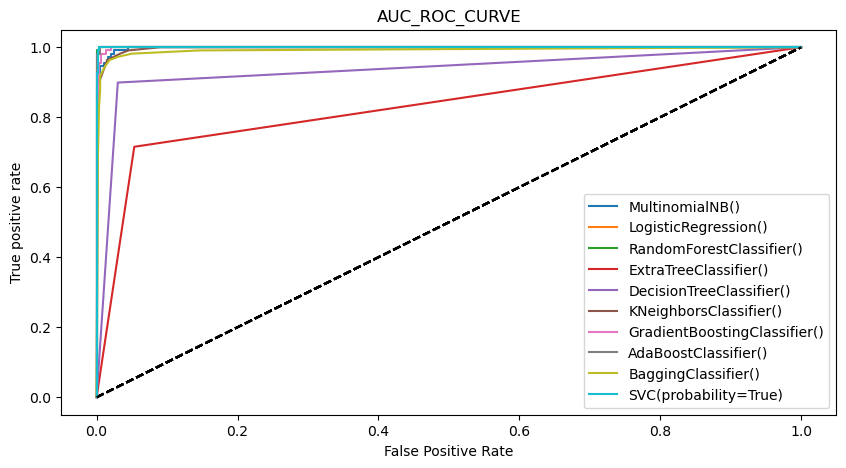

In [169]:
model = [MB,LR,RFC,ETC,DTC,KNC,GBC,ABC,BC,svc]
auc=[]


plt.figure(figsize=(10,5))
for i in model:
    y_pred_prob = i.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob,pos_label=True)
    plt.plot(fpr,tpr,label=i )
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive rate')
    plt.title('AUC_ROC_CURVE')
    plt.legend()


    auc_score = roc_auc_score(y_test,i.predict(x_test))
    auc.append(auc_score)
    print(i,auc_score)
plt.show()

## Hyper Parameter Tuning

In [170]:
from sklearn.model_selection import GridSearchCV

In [181]:
grid_params={'n_estimators':[50,100,150,200], 'learning_rate': [1.0,2.0], 'algorithm':['SAMME','SAMME.R']}
             
        
gs = GridSearchCV(AdaBoostClassifier(),param_grid=grid_params)

g_res = gs.fit(x_train,y_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1.0, 2.0],
                         'n_estimators': [50, 100, 150, 200]})
Best Score 0.9886970033296338
Best Params {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}


In [182]:
# Applying parameters for AdaBoostClassifier

Final_Model = AdaBoostClassifier(algorithm ='SAMME', learning_rate = 1.0, n_estimators = 200)
                                
                                       
Final_Model.fit(x_train,y_train)
pred1 = Final_Model.predict(x_test)
print(Final_Model.score(x_train,y_train))
cross_validation_score= cross_val_score(Final_Model,x,y,cv=5)

print('Accuracy_score',accuracy_score(y_test,pred1)*100)
print('CV score of AdaBoost Classifier:',cross_validation_score.mean()*100)
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

1.0
Accuracy_score 99.57627118644068
CV score of AdaBoost Classifier: 98.90509220308985
[[596   3]
 [  0 109]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       599
           1       0.97      1.00      0.99       109

    accuracy                           1.00       708
   macro avg       0.99      1.00      0.99       708
weighted avg       1.00      1.00      1.00       708



## AUC_ROC_Score Final Model

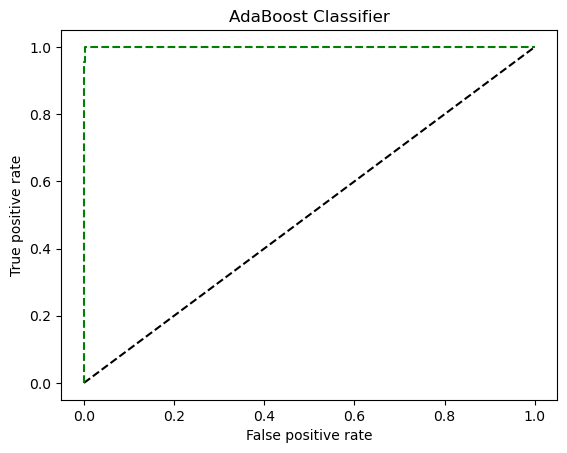

0.9974958263772955

In [183]:
# Checking roc_auc_score for AdaBoost Classifier

y_pred_prob_ABC = Final_Model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_ABC, pos_label = True)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr, label = 'ABC', linestyle = '--', color = 'g')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoost Classifier')
plt.show()

auc_score = roc_auc_score(y_test,Final_Model.predict(x_test))
auc_score

# Saving and Predicting the Model

In [184]:
# Saving the Model

import joblib

joblib.dump(Final_Model,"Spam_Email_Prediction.pkl")

['Spam_Email_Prediction.pkl']

In [185]:
# Loading the model

Model = joblib.load("Spam_Email_Prediction.pkl")

# Prediction

prediction = Model.predict(x_test)
prediction

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [186]:
pd.set_option("display.max_rows",None)
pd.DataFrame([Model.predict(x_test)[:],y_test[:]], index = ['Original', 'Predicted']).T

,Original,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
